In [2]:
#Export model from .pt format to tflite for flutter integration 
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("C:/Users/PC/Downloads/best.pt")  # load a custom trained model

# Export the model
model.export(format="tflite")

Ultralytics YOLOv8.2.2  Python-3.9.13 torch-2.2.2+cpu CPU (Intel Core(TM) i7-4510U 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'C:\Users\PC\Downloads\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (17.6 MB)


TensorFlow SavedModel: starting export with tensorflow 2.15.0...
WARNING  tensorflow<=2.13.1 is required, but tensorflow==2.15.0 is currently installed https://github.com/ultralytics/ultralytics/issues/5161

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success  2.5s, saved as 'C:\Users\PC\Downloads\best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success  29.6s, saved as 'C:\Users\PC\Downloads\best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success  0.0s, saved as 'C:\Users\PC\Downloads\

'C:\\Users\\PC\\Downloads\\best_saved_model\\best_float32.tflite'

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("C:/Users/PC/Downloads/best.pt")

# Define source as YouTube video URL
source = "https://www.youtube.com/watch?v=_kMzM-kKfAk"

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("C:/Users/PC/Downloads/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model("C:/Users/PC/Desktop/38.jpg")  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


image 1/1 C:\Users\PC\Desktop\38.jpg: 640x640 10 Unhealthy-Leafs, 662.3ms
Speed: 21.8ms preprocess, 662.3ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
import pandas as pd

# Load the new results.csv file
file_path_new = 'results.csv'
results_df_new = pd.read_csv(file_path_new)

# Display the first few rows of the dataframe to inspect the contents
print(results_df_new.head())


                     epoch           train/box_loss           train/cls_loss  \
0                        1                   1.5819                   2.6151   
1                        2                   1.6120                   2.3384   
2                        3                   1.6219                   2.2983   
3                        4                   1.5998                   2.2408   
4                        5                   1.5805                   2.1899   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.7755                  0.25568                  0.32031   
1                   1.8169                  0.19190                  0.26228   
2                   1.8355                  0.26586                  0.28348   
3                   1.8173                  0.30095                  0.32812   
4                   1.8014                  0.38322                  0.41082   

          metrics/mAP50(B)      metric

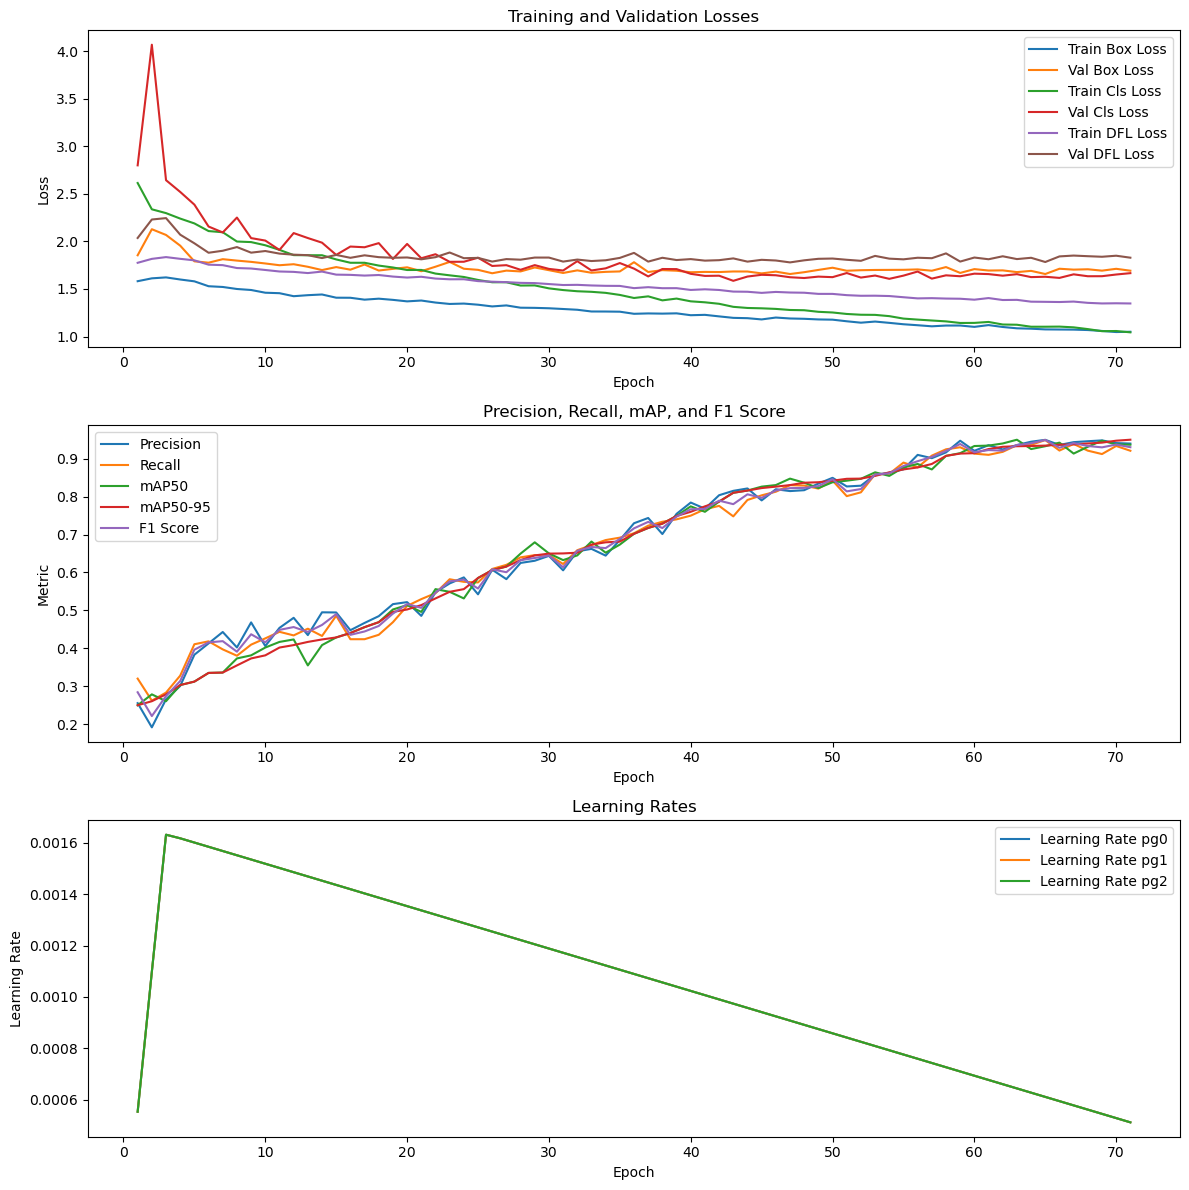

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new results.csv file
file_path_new = 'results.csv'
results_df_new = pd.read_csv(file_path_new)

# Simplify column names
results_df_new.columns = [
    'epoch', 'train_box_loss', 'train_cls_loss', 'train_dfl_loss', 
    'precision', 'recall', 'mAP50', 'mAP50_95', 
    'val_box_loss', 'val_cls_loss', 'val_dfl_loss', 
    'lr_pg0', 'lr_pg1', 'lr_pg2'
]

# Calculate F1 Score
results_df_new['F1'] = 2 * (results_df_new['precision'] * results_df_new['recall']) / (results_df_new['precision'] + results_df_new['recall'])

# Plot training and validation losses
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(results_df_new['epoch'], results_df_new['train_box_loss'], label='Train Box Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_box_loss'], label='Val Box Loss')
plt.plot(results_df_new['epoch'], results_df_new['train_cls_loss'], label='Train Cls Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_cls_loss'], label='Val Cls Loss')
plt.plot(results_df_new['epoch'], results_df_new['train_dfl_loss'], label='Train DFL Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_dfl_loss'], label='Val DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')

# Plot metrics
plt.subplot(3, 1, 2)
plt.plot(results_df_new['epoch'], results_df_new['precision'], label='Precision')
plt.plot(results_df_new['epoch'], results_df_new['recall'], label='Recall')
plt.plot(results_df_new['epoch'], results_df_new['mAP50'], label='mAP50')
plt.plot(results_df_new['epoch'], results_df_new['mAP50_95'], label='mAP50-95')
plt.plot(results_df_new['epoch'], results_df_new['F1'], label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.title('Precision, Recall, mAP, and F1 Score')

# Plot learning rates
plt.subplot(3, 1, 3)
plt.plot(results_df_new['epoch'], results_df_new['lr_pg0'], label='Learning Rate pg0')
plt.plot(results_df_new['epoch'], results_df_new['lr_pg1'], label='Learning Rate pg1')
plt.plot(results_df_new['epoch'], results_df_new['lr_pg2'], label='Learning Rate pg2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rates')

plt.tight_layout()
plt.show()


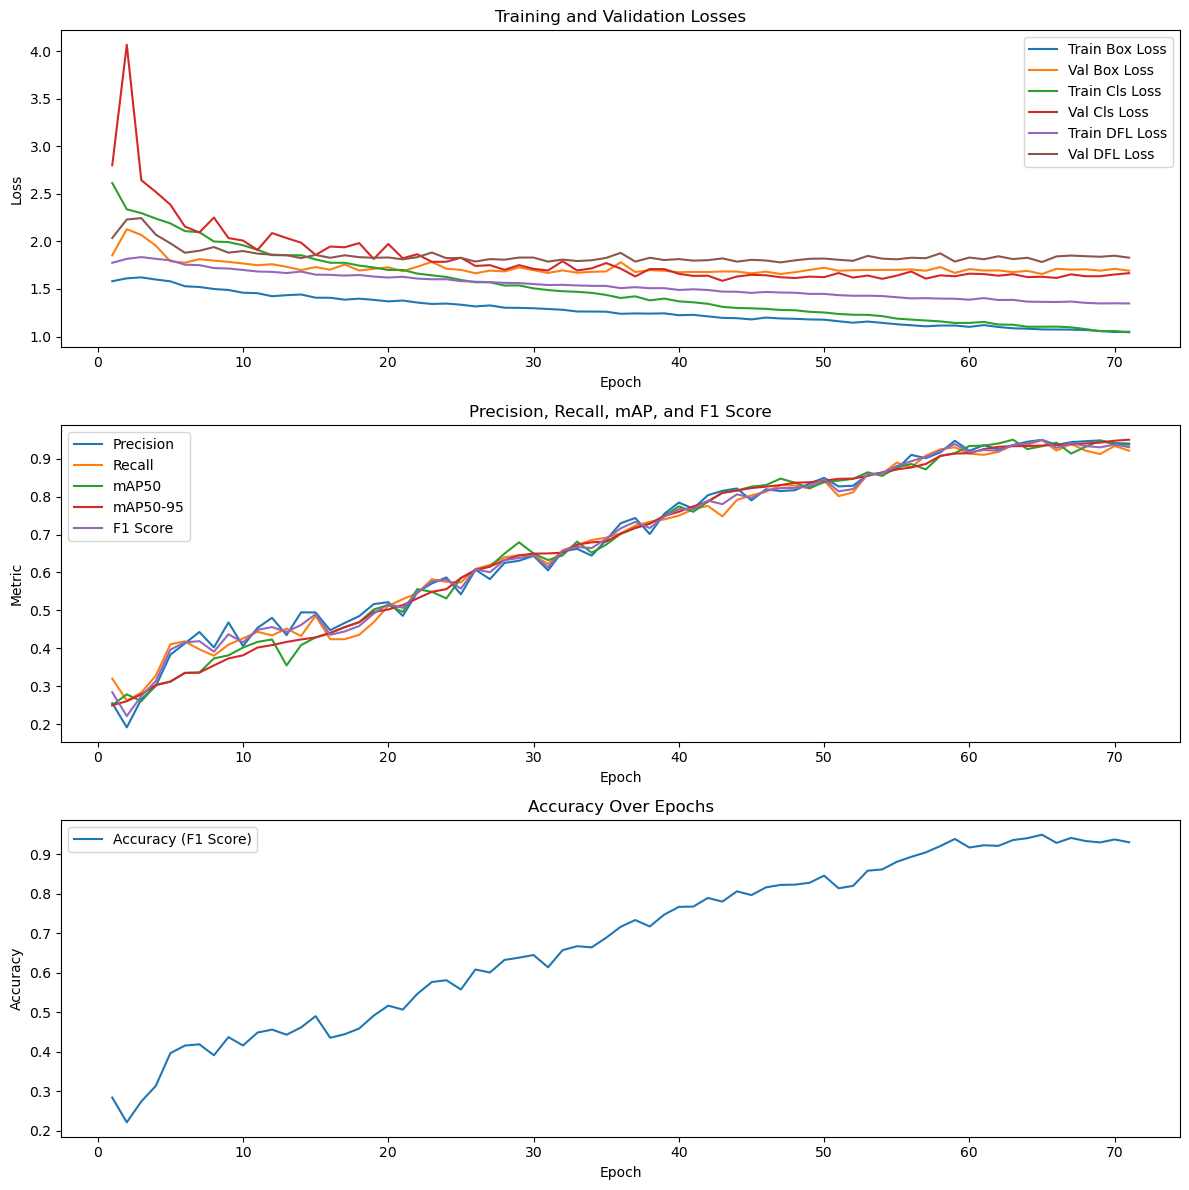

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new results.csv file
file_path_new = 'results.csv'
results_df_new = pd.read_csv(file_path_new)

# Simplify column names
results_df_new.columns = [
    'epoch', 'train_box_loss', 'train_cls_loss', 'train_dfl_loss', 
    'precision', 'recall', 'mAP50', 'mAP50_95', 
    'val_box_loss', 'val_cls_loss', 'val_dfl_loss', 
    'lr_pg0', 'lr_pg1', 'lr_pg2'
]

# Calculate F1 Score
results_df_new['F1'] = 2 * (results_df_new['precision'] * results_df_new['recall']) / (results_df_new['precision'] + results_df_new['recall'])

# Plot training and validation losses
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(results_df_new['epoch'], results_df_new['train_box_loss'], label='Train Box Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_box_loss'], label='Val Box Loss')
plt.plot(results_df_new['epoch'], results_df_new['train_cls_loss'], label='Train Cls Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_cls_loss'], label='Val Cls Loss')
plt.plot(results_df_new['epoch'], results_df_new['train_dfl_loss'], label='Train DFL Loss')
plt.plot(results_df_new['epoch'], results_df_new['val_dfl_loss'], label='Val DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')

# Plot metrics
plt.subplot(3, 1, 2)
plt.plot(results_df_new['epoch'], results_df_new['precision'], label='Precision')
plt.plot(results_df_new['epoch'], results_df_new['recall'], label='Recall')
plt.plot(results_df_new['epoch'], results_df_new['mAP50'], label='mAP50')
plt.plot(results_df_new['epoch'], results_df_new['mAP50_95'], label='mAP50-95')
plt.plot(results_df_new['epoch'], results_df_new['F1'], label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.title('Precision, Recall, mAP, and F1 Score')

# Plot F1 Score as a proxy for accuracy
plt.subplot(3, 1, 3)
plt.plot(results_df_new['epoch'], results_df_new['F1'], label='Accuracy (F1 Score)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import torch
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO('C:/Users/PC/Downloads/best.pt')

# Initialize webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Predict using YOLOv8 model
    results = model(frame)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Get coordinates and other attributes
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            confidence = box.conf.tolist()[0]
            cls = int(box.cls.tolist()[0])
            label = model.names[cls]

            # Draw bounding box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # Put label
            cv2.putText(frame, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame
    cv2.imshow('Tomato Plant Disease Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 226.0ms
Speed: 0.0ms preprocess, 226.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 257.7ms
Speed: 8.0ms preprocess, 257.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 229.2ms
Speed: 7.8ms preprocess, 229.2ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Unhealthy-Leafs, 219.5ms
Speed: 8.3ms preprocess, 219.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 217.4ms
Speed: 4.0ms preprocess, 217.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 217.0ms
Speed: 0.0ms preprocess, 217.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 246.1ms
Speed: 0.0ms preprocess, 246.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Unhealthy-Leaf, 208.6ms
Speed: 2.

In [1]:
import cv2
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO("C:/Users/PC/Downloads/best.pt")

# Define path to video file
source = "C:/Users/PC/Desktop/46.mp4"

# Open video file
cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print(f"Error: Could not open video {source}")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    # Run inference on the frame
    results = model(frame)

    # Process the results
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Get coordinates and other attributes
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            confidence = box.conf.tolist()[0]
            cls = int(box.cls.tolist()[0])
            label = model.names[cls]

            # Draw bounding box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # Put label
            cv2.putText(frame, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame
    cv2.imshow('Tomato Plant Disease Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


Error: Could not open video C:/Users/PC/Desktop/46.mp4
End of video or error reading frame.
